# 🆔 Aadhaar Data-Driven Innovation: Infrastructure Capacity & Trends



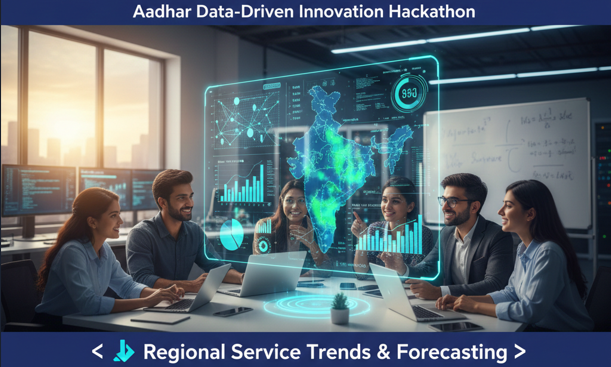

###  📂 Dataset Overview
> The project utilizes three primary anonymized datasets: Biometrics, Enrollment, and Demographics. All datasets are linked by common keys: Date, State, District, and Pincode.

**Dataset ; Record_Count  ;Total_Transactions**
* **Enrollment  ; 1,006,029   ; 51,222,945**
* **Demographics ; 2,071,700  ;  6,651,618**

# **Date Range :-**
**January 3, 2025 – December 12, 2025.**

# 🗂️ Biometrics Dataset (df_bio)

**Tracks biometric update activities categorized by age groups.**

* **Columns: date, state, district, pincode, bio_age_5_17, bio_age_17_.**

# 🗂️ Enrollment Dataset (df_enroll)
**Tracks new Aadhaar enrollments categorized by age.**

* **Columns: date, state, district, pincode, age_0_5, age_5_17, age_18_greater.**

# 🗂️ Demographics Dataset (df_demo) 

**Tracks demographic-related updates (e.g., address, name).**

* **Columns: date, state, district, pincode, demo_age_5_17, demo_age_17_.**


#   🔍 Geographic Coverage
**The dataset spans across India, covering a wide range of administrative regions:**

* States/UTs: 36.
* Districts: 1,028.
* Pincodes: 19,814.


# 🔄 Data Completeness
**Upon merging all three datasets, 25.67% of the resulting records contain synchronized data for biometrics, enrollment, and demographics for the same location and date.**

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
pd.options.display.float_format = lambda x: ('%f' % x).rstrip('0').rstrip('.') if not pd.isna(x) else ''

import warnings
warnings.filterwarnings(
    "ignore",
    message="Parsing dates in .* dayfirst=False"
)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [40]:
df_bio = pd.read_csv("/kaggle/input/addharfh/finalBiometrics.xls")
df_enroll = pd.read_csv("/kaggle/input/addharfh/finalEnrollment.xls")
df_demo = pd.read_csv("/kaggle/input/addharfh/finalDemographics.xls")

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview 
    </h1>
</div>


In [41]:
df_bio.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [42]:
df_enroll.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [43]:
df_demo.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Min Date 
        Max Date   
    </h1>
</div>


In [44]:
for name, df in [("Bio", df_bio), ("Enroll", df_enroll), ("Demo", df_demo)]:
    print(name, "min date:", df["date"].min())
    print(name, "max date:", df["date"].max())
    print()

Bio min date: 01-03-2025
Bio max date: 31-10-2025

Enroll min date: 01-04-2025
Enroll max date: 31-12-2025

Demo min date: 01-03-2025
Demo max date: 31-10-2025



<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        📅  Temporal Consistency & Timeline Analysis
    </h1>
</div>


In [45]:
dfs = [("Bio", df_bio), ("Enroll", df_enroll), ("Demo", df_demo)]
stats = []

for name, df_single in dfs:
    # Convert to datetime
    dates = pd.to_datetime(df_single["date"], errors="coerce").dropna().dt.date
    
    if len(dates) == 0:
        stats.append({
            "Dataset": name,
            "Min Date": pd.NaT,
            "Max Date": pd.NaT,
            "Mean Jump (days)": pd.NA
        })
        continue

    # Unique sorted dates
    dates = pd.Series(sorted(dates)).drop_duplicates()
    
    # Compute jumps between consecutive dates
    jumps = dates.diff().dropna().apply(lambda x: x.days)
    
    # Only positive jumps
    jumps = jumps[jumps > 0]
    
    stats.append({
        "Dataset": name,
        "Min Date": dates.min(),
        "Max Date": dates.max(),
        "Mean Jump (days)": jumps.mean() if not jumps.empty else pd.NA
    })

# Create summary dataframe
summary_df = pd.DataFrame(stats)
summary_df

,Dataset,Min Date,Max Date,Mean Jump (days)
0,Bio,2025-01-03,2025-12-12,8.575
1,Enroll,2025-01-04,2025-12-11,11.758621
2,Demo,2025-01-03,2025-12-12,8.575


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        rows and columns
    </h1>
</div>


In [46]:
df_bio.shape,df_enroll.shape,df_demo.shape

((1861108, 6), (1006029, 7), (2071700, 6))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🔗 Data Integration: Multi-Source Merging
    </h1>
</div>


In [47]:
keys = ["date", "state", "district", "pincode"]

df = df_bio.merge(df_enroll, on=keys, how="outer")
df = df.merge(df_demo, on=keys, how="outer")


In [48]:
df

,date,state,district,pincode,bio_age_5_17,bio_age_17_,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_
0,01-03-2025,Andaman & Nicobar Islands,Andamans,744101,16,193,NaN,NaN,NaN,NaN,NaN
1,01-03-2025,Andaman and Nicobar Islands,Nicobar,744301,101,48,NaN,NaN,NaN,16,180
2,01-03-2025,Andaman and Nicobar Islands,Nicobar,744301,101,48,NaN,NaN,NaN,16,180
3,01-03-2025,Andaman and Nicobar Islands,Nicobar,744302,15,12,NaN,NaN,NaN,NaN,NaN
4,01-03-2025,Andaman and Nicobar Islands,Nicobar,744303,46,27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2947676,31-12-2025,West Bengal,West Midnapore,721426,NaN,NaN,0,1,0,NaN,NaN
2947677,31-12-2025,West Bengal,West Midnapore,721504,NaN,NaN,1,0,0,NaN,NaN
2947678,31-12-2025,West Bengal,West Midnapore,721506,NaN,NaN,1,1,0,NaN,NaN
2947679,31-12-2025,West Bengal,West Midnapore,721507,NaN,NaN,1,0,0,NaN,NaN


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🛠️  Feature Engineering: Metric Aggregation
    </h1>
</div>


In [49]:
# Column groups
bio_cols = ["bio_age_5_17", "bio_age_17_"]
enroll_cols = ["demo_age_5_17", "demo_age_17_"]
demo_cols = ["age_0_5", "age_5_17", "age_18_greater"]

# --- Total Biometrics ---
df["total_biometrics"] = df[bio_cols].mask(df[bio_cols] == -1).sum(axis=1, skipna=True)
df["total_biometrics"] = df["total_biometrics"].where(df[bio_cols].notna().any(axis=1), pd.NA)

# --- Total Enrollment ---
df["total_enrollment"] = df[enroll_cols].mask(df[enroll_cols] == -1).sum(axis=1, skipna=True)
df["total_enrollment"] = df["total_enrollment"].where(df[enroll_cols].notna().any(axis=1), pd.NA)

# --- Total Demographics ---
df["total_demographics"] = df[demo_cols].mask(df[demo_cols] == -1).sum(axis=1, skipna=True)
df["total_demographics"] = df["total_demographics"].where(df[demo_cols].notna().any(axis=1), pd.NA)


In [50]:
df = df[
    [
        "date", "state", "district", "pincode",       # keys
        "bio_age_5_17", "bio_age_17_", "total_biometrics",        # biometrics + total
        "demo_age_5_17", "demo_age_17_", "total_enrollment",      # enrollment + total
        "age_0_5", "age_5_17", "age_18_greater", "total_demographics"   # demographics + total
    ]
]

In [51]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,total_biometrics,demo_age_5_17,demo_age_17_,total_enrollment,age_0_5,age_5_17,age_18_greater,total_demographics
0,01-03-2025,Andaman & Nicobar Islands,Andamans,744101,16,193,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-03-2025,Andaman and Nicobar Islands,Nicobar,744301,101,48,149,16,180,196,NaN,NaN,NaN,NaN
2,01-03-2025,Andaman and Nicobar Islands,Nicobar,744301,101,48,149,16,180,196,NaN,NaN,NaN,NaN
3,01-03-2025,Andaman and Nicobar Islands,Nicobar,744302,15,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2025,Andaman and Nicobar Islands,Nicobar,744303,46,27,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.shape

(2947681, 14)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🧹  Data Cleaning & Integrity Audit
    </h1>
</div>


In [53]:
# Numeric columns
num_cols = ["bio_age_5_17","bio_age_17_",
            "demo_age_5_17","demo_age_17_",
            "age_0_5","age_5_17","age_18_greater",
            "total_biometrics","total_enrollment","total_demographics"]

# Rows jisme numeric columns me NaN nahi hai
complete_rows = df[df[num_cols].notna().all(axis=1)]

# Completion %
completion_pct = (len(complete_rows) / len(df)) * 100
print("Complete Rows :", round(completion_pct, 2), "%")

Complete Rows : 25.67 %


In [54]:
df['state'].unique()

array(['Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu',
       'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Orissa',
       'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Jammu And Kashmir', 'Jammu & Kashmir', 'ODISHA', 'WEST BENGAL',
       'WESTBENGAL', 'West  Bengal', 'West bengal', 'Westbengal',
       'andhra pradesh', 'odisha', 'west Bengal', 'West Bangal'

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        State Name Canonicalization
    </h1>
</div>


In [55]:
df["state"] = df["state"].str.lower().str.replace(r"\s+", " ", regex=True)

STATE_CANONICAL_MAP = {
    "pondicherry": "Puducherry",
    "puducherry": "Puducherry",
    
    "daman and diu": "Dadra And Nagar Haveli And Daman And Diu",
    "daman & diu": "Dadra And Nagar Haveli And Daman And Diu",
    "dadra and nagar haveli": "Dadra And Nagar Haveli And Daman And Diu",
    "dadra & nagar haveli": "Dadra And Nagar Haveli And Daman And Diu",
    "dadra and nagar haveli and daman and diu":
        "Dadra And Nagar Haveli And Daman And Diu",
    "the dadra and nagar haveli and daman and diu":
        "Dadra And Nagar Haveli And Daman And Diu",

    "west bengal": "West Bengal",
    "west bangal": "West Bengal",
    "west bengli": "West Bengal",
    "westbengal": "West Bengal",
    "west  bengal": "West Bengal",

    "orissa": "Odisha",

    "tamilnadu": "Tamil Nadu",
    "tamil nadu": "Tamil Nadu",

    "uttaranchal": "Uttarakhand",

    "chhatisgarh": "Chhattisgarh",
    "chhattisgarh": "Chhattisgarh",

    "jammu & kashmir": "Jammu And Kashmir",
    "jammu and kashmir": "Jammu And Kashmir",

    "andaman & nicobar islands": "Andaman And Nicobar Islands",
    "andaman and nicobar islands": "Andaman And Nicobar Islands",

    "darbhanga": "Bihar",
    "nagpur": "Maharashtra",
    "jaipur": "Rajasthan",
    "balanagar": "Telangana",
    "puttenahalli": "Karnataka",
    "raja annamalai puram": "Tamil Nadu",
    "madanapalle": "Andhra Pradesh",
}

df["state"] = df["state"].replace(STATE_CANONICAL_MAP).str.title()

In [56]:
df.drop(df[df["state"] == "100000"].index, inplace=True)

In [57]:
df['state'].unique()

array(['Andaman And Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
📊  Dataset Executive Summary
    </h1>
</div>


In [61]:
# Displaying Scale Metrics
display(Markdown(f"### 📈 Operational Scale"))
print(f"Total Records in Integrated Pool : {len(df):,}")

# Summing valid transactions (handling sparse data)
print(f"Total Biometric Transactions    : {df['total_biometrics'].sum(skipna=True):,}")
print(f"Total Enrollment Transactions   : {df['total_enrollment'].sum(skipna=True):,}")
print(f"Total Demographic Updates       : {df['total_demographics'].sum(skipna=True):,}")

# Temporal Span Audit
valid_dates = pd.to_datetime(df['date'], errors='coerce').dropna()
display(Markdown(f"### 📅 Temporal Coverage"))
print(f"Observation Period: {valid_dates.min().date()} to {valid_dates.max().date()}")

# Geographic Footprint
display(Markdown(f"### 🗺️ Geographic Breadth"))
print(f"Total States/UTs Covered : {df['state'].nunique(dropna=True)}")
print(f"Total Districts Analyzed : {df['district'].nunique(dropna=True)}")
print(f"Unique Pincodes (Units)  : {df['pincode'].nunique(dropna=True)}")

### 📈 Operational Scale

Total Records in Integrated Pool : 2,947,657
Total Biometric Transactions    : 81,107,526.0
Total Enrollment Transactions   : 51,222,945.0
Total Demographic Updates       : 6,651,618.0


### 📅 Temporal Coverage

Observation Period: 2025-01-03 to 2025-12-12


### 🗺️ Geographic Breadth

Total States/UTs Covered : 36
Total Districts Analyzed : 1028
Unique Pincodes (Units)  : 19814


# <!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
      🏆 Regional Performance Benchmarking 
    </h1>
</div>


In [62]:
# Metrics for comparative analysis
totals = ["total_biometrics", "total_enrollment", "total_demographics"]

for total_col in totals:
    # Aggregating by state and sorting
    state_total = df.groupby("state")[total_col].sum().sort_values(ascending=False)
    state_share = (state_total / state_total.sum()) * 100
    
    # --- TOP 10 RANKING ---
    display(Markdown(f"<h3 style='text-align:center; padding: 10px;'><b>🥇 Top 10 States: {total_col.replace('_',' ').title()}</b></h3>"))
    
    # Displaying with Share percentage for context
    ranking_df = pd.DataFrame({
        "Total Count": state_total.head(10).map('{:,}'.format),
        "National Share (%)": state_share.head(10).map('{:.2f}%'.format)
    })
    display(ranking_df)
    
    # --- BOTTOM 10 RANKING ---
    display(Markdown(f"<h3 style='text-align:center; padding: 10px;'><b>🔻 Bottom 10 States: {total_col.replace('_',' ').title()}</b></h3>"))
    
    bottom_df = pd.DataFrame({
        "Total Count": state_total.tail(10).map('{:,}'.format),
        "National Share (%)": state_share.tail(10).map('{:.2f}%'.format)
    })
    display(bottom_df)


<h3 style='text-align:center; padding: 10px;'><b>🥇 Top 10 States: Total Biometrics</b></h3>

,Total Count,National Share (%)
state,,
Uttar Pradesh,"10,929,837.0",13.48%
Maharashtra,"10,595,450.0",13.06%
Madhya Pradesh,"7,129,250.0",8.79%
Bihar,"5,568,926.0",6.87%
Tamil Nadu,"5,379,226.0",6.63%
Rajasthan,"4,720,788.0",5.82%
Andhra Pradesh,"4,348,843.0",5.36%
Gujarat,"3,637,123.0",4.48%
Chhattisgarh,"3,241,343.0",4.00%


<h3 style='text-align:center; padding: 10px;'><b>🔻 Bottom 10 States: Total Biometrics</b></h3>

,Total Count,National Share (%)
state,,
Chandigarh,"102,137.0",0.13%
Meghalaya,"98,412.0",0.12%
Arunachal Pradesh,"81,784.0",0.10%
Puducherry,"79,284.0",0.10%
Goa,"75,223.0",0.09%
Dadra And Nagar Haveli And Daman And Diu,"44,638.0",0.06%
Sikkim,"24,826.0",0.03%
Andaman And Nicobar Islands,"23,328.0",0.03%
Ladakh,"6,517.0",0.01%


<h3 style='text-align:center; padding: 10px;'><b>🥇 Top 10 States: Total Enrollment</b></h3>

,Total Count,National Share (%)
state,,
Uttar Pradesh,"8,863,254.0",17.30%
Maharashtra,"5,241,978.0",10.23%
Bihar,"5,128,088.0",10.01%
West Bengal,"4,035,467.0",7.88%
Madhya Pradesh,"2,979,860.0",5.82%
Rajasthan,"2,898,975.0",5.66%
Andhra Pradesh,"2,383,026.0",4.65%
Tamil Nadu,"2,309,389.0",4.51%
Chhattisgarh,"2,091,945.0",4.08%


<h3 style='text-align:center; padding: 10px;'><b>🔻 Bottom 10 States: Total Enrollment</b></h3>

,Total Count,National Share (%)
state,,
Mizoram,"42,838.0",0.08%
Arunachal Pradesh,"38,537.0",0.08%
Nagaland,"37,836.0",0.07%
Goa,"36,801.0",0.07%
Puducherry,"33,687.0",0.07%
Sikkim,"20,838.0",0.04%
Dadra And Nagar Haveli And Daman And Diu,"12,564.0",0.02%
Andaman And Nicobar Islands,"7,554.0",0.01%
Ladakh,"5,936.0",0.01%


<h3 style='text-align:center; padding: 10px;'><b>🥇 Top 10 States: Total Demographics</b></h3>

,Total Count,National Share (%)
state,,
Uttar Pradesh,"1,244,394.0",18.71%
Bihar,"736,142.0",11.07%
Madhya Pradesh,"616,502.0",9.27%
West Bengal,"463,080.0",6.96%
Maharashtra,"457,885.0",6.88%
Rajasthan,"423,114.0",6.36%
Gujarat,"332,746.0",5.00%
Tamil Nadu,"273,271.0",4.11%
Assam,"271,122.0",4.08%


<h3 style='text-align:center; padding: 10px;'><b>🔻 Bottom 10 States: Total Demographics</b></h3>

,Total Count,National Share (%)
state,,
Mizoram,"7,036.0",0.11%
Arunachal Pradesh,"5,348.0",0.08%
Puducherry,"3,666.0",0.06%
Chandigarh,"3,538.0",0.05%
Goa,"2,832.0",0.04%
Sikkim,"2,571.0",0.04%
Dadra And Nagar Haveli And Daman And Diu,"2,010.0",0.03%
Ladakh,743.0,0.01%
Andaman And Nicobar Islands,628.0,0.01%


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
     📈   Regional Demand Distribution
    </h1>
</div>


/tmp/ipykernel_55/3480550031.py:25: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


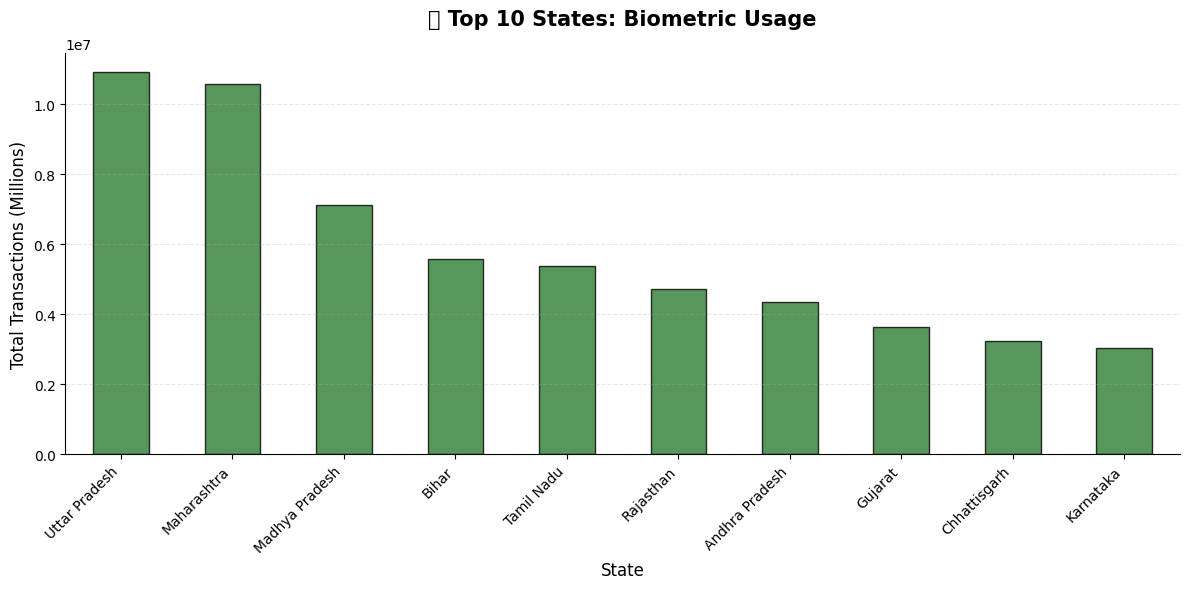

/tmp/ipykernel_55/3480550031.py:25: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


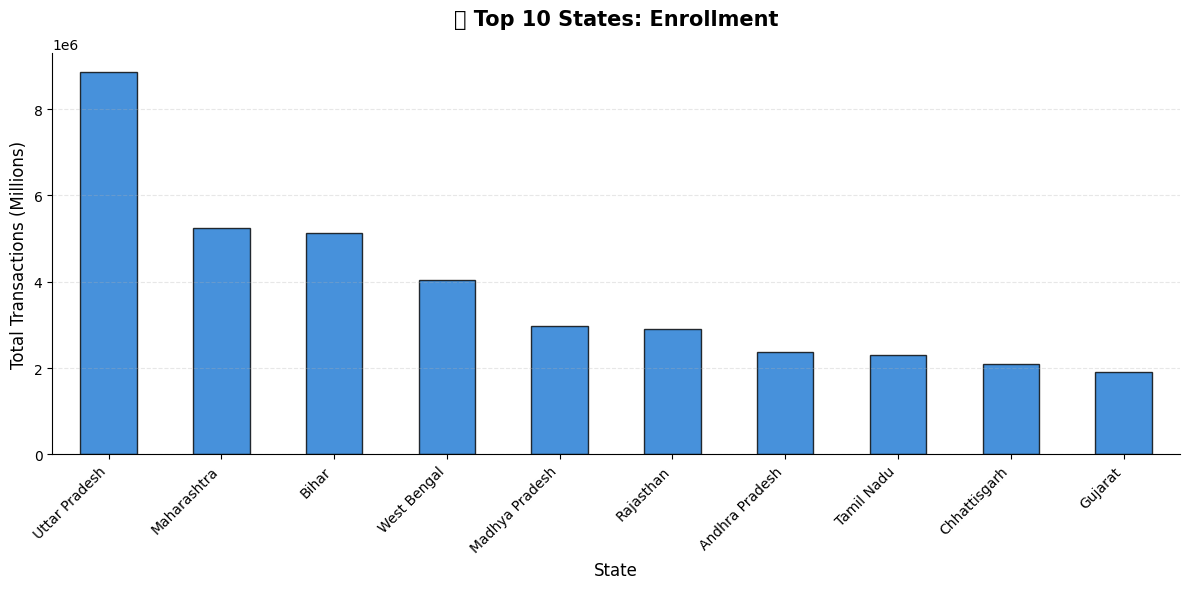

/tmp/ipykernel_55/3480550031.py:25: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


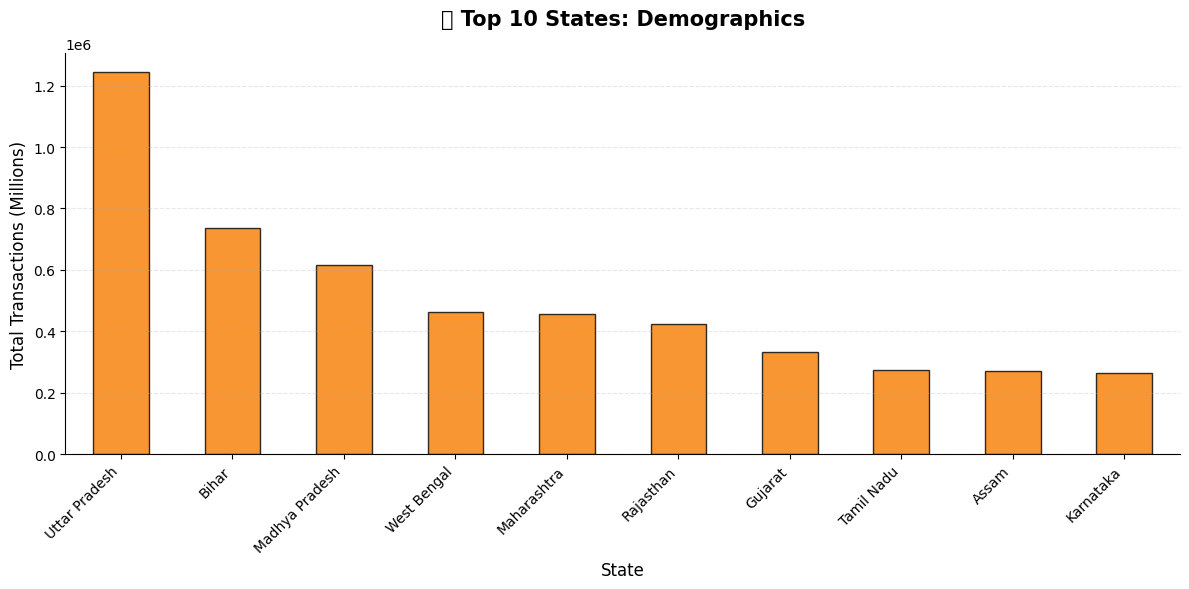

In [63]:
# Refined Color Palette for Professional Aesthetics
colors = ["#2e7d32", "#1976d2", "#f57c00"]  # Green, Blue, Orange
totals = ["total_biometrics", "total_enrollment", "total_demographics"]
titles = ["Biometric Usage", "Enrollment", "Demographics"]

for total_col, title, color in zip(totals, titles, colors):
    state_total = df.groupby("state")[total_col].sum().sort_values(ascending=False)
    top10 = state_total.head(10)

    # Creating the Chart
    plt.figure(figsize=(12,6))
    top10.plot(kind="bar", color=color, edgecolor='black', alpha=0.8)
    
    # Adding descriptive styling
    plt.title(f"🏆 Top 10 States: {title}", fontsize=15, fontweight='bold', pad=20)
    plt.ylabel("Total Transactions (Millions)", fontsize=12)
    plt.xlabel("State", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    
    # Matching Kaggle Style: Removing top/right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
🎯  Infrastructure High-Load Audit    </h1>
</div>


In [64]:
# Configuration for Analysis
totals = ["total_biometrics", "total_enrollment", "total_demographics"]
titles = ["Biometric Usage", "Enrollment", "Demographics"]

for total_col, title, color in zip(totals, titles, bg_colors):
    # 1. Defining the 90th percentile 'Stress Threshold'
    threshold = df[total_col].dropna().quantile(0.90)
    
    # 2. Flagging High-Load Events (preserving NaNs for data integrity)
    high_load_col = f"high_load_{total_col}"
    df[high_load_col] = df[total_col].where(df[total_col].notna())
    df[high_load_col] = df[high_load_col].apply(lambda x: 1 if x >= threshold else 0 if pd.notna(x) else pd.NA)
    
    # 3. Calculating State-wise Stress Ratio
    state_highload = df.groupby("state")[high_load_col].mean().sort_values(ascending=False)
    
    # --- DISPLAY: HIGH STRESS STATES ---
    display(Markdown(f"<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>⚠️ High-Load Risk: {title} (Top 10)</b></h3>"))
    
    # Displaying as a styled DataFrame for Kaggle professional look
    high_risk_df = pd.DataFrame(state_highload.head(10)).rename(columns={high_load_col: "Stress Ratio"})
    display(high_risk_df.style.background_gradient(cmap='Reds'))
    
    # --- DISPLAY: STABLE STATES ---
    display(Markdown(f"<h3 style='text-align:center; border: 1px solid #ddd; padding: 10px;'><b>✅ Operational Stability: {title} (Bottom 10)</b></h3>"))
    
    low_risk_df = pd.DataFrame(state_highload.tail(10)).rename(columns={high_load_col: "Stress Ratio"})
    display(low_risk_df)
    
    print("\n" + "-"*50 + "\n")

<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>⚠️ High-Load Risk: Biometric Usage (Top 10)</b></h3>

,Stress Ratio
state,
Delhi,0.292858
Chhattisgarh,0.291736
Maharashtra,0.203474
Madhya Pradesh,0.181836
Haryana,0.167083
Uttar Pradesh,0.165844
Rajasthan,0.152585
Manipur,0.147924
Bihar,0.132463


<h3 style='text-align:center; border: 1px solid #ddd; padding: 10px;'><b>✅ Operational Stability: Biometric Usage (Bottom 10)</b></h3>

,Stress Ratio
state,
Karnataka,0.051977
Kerala,0.05114
West Bengal,0.047859
Goa,0.042523
Himachal Pradesh,0.041984
Sikkim,0.040774
Lakshadweep,0.039872
Puducherry,0.037953
Ladakh,0.036405



--------------------------------------------------



<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>⚠️ High-Load Risk: Enrollment (Top 10)</b></h3>

,Stress Ratio
state,
Delhi,0.348152
Bihar,0.346527
Uttar Pradesh,0.281268
Chhattisgarh,0.256350
Manipur,0.229125
Jharkhand,0.175712
Maharashtra,0.175152
Chandigarh,0.129211
Haryana,0.125646


<h3 style='text-align:center; border: 1px solid #ddd; padding: 10px;'><b>✅ Operational Stability: Enrollment (Bottom 10)</b></h3>

,Stress Ratio
state,
Odisha,0.016921
Ladakh,0.014365
Mizoram,0.014159
Kerala,0.010283
Himachal Pradesh,0.008853
Goa,0.007069
Sikkim,0.006892
Puducherry,0.005568
Andaman And Nicobar Islands,0.005522



--------------------------------------------------



<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>⚠️ High-Load Risk: Demographics (Top 10)</b></h3>

,Stress Ratio
state,
Delhi,0.279542
Madhya Pradesh,0.262715
Bihar,0.252445
Meghalaya,0.225000
Uttar Pradesh,0.198308
Jharkhand,0.187183
Rajasthan,0.143861
Chhattisgarh,0.132625
Haryana,0.128549


<h3 style='text-align:center; border: 1px solid #ddd; padding: 10px;'><b>✅ Operational Stability: Demographics (Bottom 10)</b></h3>

,Stress Ratio
state,
Tamil Nadu,0.015955
Kerala,0.008571
Ladakh,0.008086
Andhra Pradesh,0.007987
Sikkim,0.003231
Himachal Pradesh,0.002928
Puducherry,0.002669
Andaman And Nicobar Islands,0.002062
Goa,0.001085



--------------------------------------------------



<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
🗺️ Advanced Modeling: Infrastructure Stress Score
    </h1>
</div>


In [65]:
state_area_km2 = {
    "Uttar Pradesh": 240928,"Maharashtra": 307713,"Madhya Pradesh": 308245,
    "Bihar": 94163,"Tamil Nadu": 130058,"Rajasthan": 342239,
    "Andhra Pradesh": 162975,"Gujarat": 196024,"Lakshadweep": 32,
    "Chhattisgarh": 135191,"Karnataka": 191791,"West Bengal": 88752,
    "Odisha": 155707,"Jharkhand": 79716,"Punjab": 50362,
    "Telangana": 112077,"Haryana": 44212,"Kerala": 38863,
    "Delhi": 1484,"Assam": 78438,"Jammu And Kashmir": 42241,
    "Uttarakhand": 53483,"Himachal Pradesh": 55673,"Tripura": 10486,
    "Manipur": 22327,"Mizoram": 21081,"Nagaland": 16579,
    "Meghalaya": 22429,"Chandigarh": 114,"Arunachal Pradesh": 83743,
    "Puducherry": 479,"Goa": 3702,
    "Dadra And Nagar Haveli And Daman And Diu": 603,
    "Sikkim": 7096,"Andaman And Nicobar Islands": 8249,"Ladakh": 59146,
}

In [66]:
totals = ["total_biometrics", "total_enrollment", "total_demographics"]
titles = ["Biometric Usage", "Enrollment", "Demographics"]

for total_col, title in zip(totals, titles):
    # 90th percentile threshold ignoring NaN
    threshold = df[total_col].dropna().quantile(0.90)
    
    # High-load flag: NaN if total_col is NaN
    high_load_col = f"high_load_{total_col}"
    df[high_load_col] = df[total_col].where(df[total_col].notna())  # keep NaN
    df[high_load_col] = df[high_load_col].apply(lambda x: 1 if x >= threshold else 0 if pd.notna(x) else pd.NA)
    
    # State-wise high-load ratio ignoring NaN
    highload_df = (
        df.groupby("state")[high_load_col]
          .mean()
          .reset_index(name="high_load_ratio")
    )
    
    # Map state areas
    highload_df["area_km2"] = highload_df["state"].map(state_area_km2)
    highload_df = highload_df.dropna(subset=["area_km2"])
    
    # Log area
    highload_df["log_area"] = np.log(highload_df["area_km2"].clip(lower=1))
    
    # Stress score
    highload_df["stress_score"] = highload_df["high_load_ratio"] / highload_df["log_area"]
    
    # Sort by stress
    highload_df = highload_df.sort_values("stress_score", ascending=False)
    
    display_cols = ["state", "high_load_ratio", "area_km2", "log_area", "stress_score"]
    
    top_10_stress = highload_df[display_cols].head(10)
    bottom_10_stress = highload_df[display_cols].tail(10)
    
    # Display
    display(Markdown(f"<h3 style='text-align:center;'><b>Top 10 States by Infrastructure Stress ({title})</b></h3>"))
    display(top_10_stress)
    
    display(Markdown(f"<h3 style='text-align:center;'><b>Bottom 10 States by Infrastructure Stress ({title})</b></h3>"))
    display(bottom_10_stress)
    print("\n" + "-"*60 + "\n")


<h3 style='text-align:center;'><b>Top 10 States by Infrastructure Stress (Biometric Usage)</b></h3>

,state,high_load_ratio,area_km2,log_area,stress_score
8,Delhi,0.292858,1484,7.302496,0.040104
6,Chhattisgarh,0.291736,135191,11.814444,0.024693
20,Maharashtra,0.203474,307713,12.636923,0.016102
11,Haryana,0.167083,44212,10.696752,0.01562
21,Manipur,0.147924,22327,10.013552,0.014772
19,Madhya Pradesh,0.181836,308245,12.63865,0.014387
33,Uttar Pradesh,0.165844,240928,12.392253,0.013383
7,Dadra And Nagar Haveli And Daman And Diu,0.084399,603,6.401917,0.013183
5,Chandigarh,0.057867,114,4.736198,0.012218
28,Rajasthan,0.152585,342239,12.743265,0.011974


<h3 style='text-align:center;'><b>Bottom 10 States by Infrastructure Stress (Biometric Usage)</b></h3>

,state,high_load_ratio,area_km2,log_area,stress_score
25,Odisha,0.05843,155707,11.955731,0.004887
16,Kerala,0.05114,38863,10.567798,0.004839
2,Arunachal Pradesh,0.053547,83743,11.335508,0.004724
29,Sikkim,0.040774,7096,8.867287,0.004598
1,Andhra Pradesh,0.05351,162975,12.001352,0.004459
15,Karnataka,0.051977,191791,12.164162,0.004273
35,West Bengal,0.047859,88752,11.393601,0.004201
0,Andaman And Nicobar Islands,0.036011,8249,9.017847,0.003993
12,Himachal Pradesh,0.041984,55673,10.927251,0.003842
17,Ladakh,0.036405,59146,10.987764,0.003313



------------------------------------------------------------



<h3 style='text-align:center;'><b>Top 10 States by Infrastructure Stress (Enrollment)</b></h3>

,state,high_load_ratio,area_km2,log_area,stress_score
8,Delhi,0.348152,1484,7.302496,0.047676
4,Bihar,0.346527,94163,11.452783,0.030257
5,Chandigarh,0.129211,114,4.736198,0.027282
21,Manipur,0.229125,22327,10.013552,0.022882
33,Uttar Pradesh,0.281268,240928,12.392253,0.022697
6,Chhattisgarh,0.25635,135191,11.814444,0.021698
14,Jharkhand,0.175712,79716,11.286226,0.015569
20,Maharashtra,0.175152,307713,12.636923,0.01386
11,Haryana,0.125646,44212,10.696752,0.011746
35,West Bengal,0.121668,88752,11.393601,0.010679


<h3 style='text-align:center;'><b>Bottom 10 States by Infrastructure Stress (Enrollment)</b></h3>

,state,high_load_ratio,area_km2,log_area,stress_score
23,Mizoram,0.014159,21081,9.956127,0.001422
25,Odisha,0.016921,155707,11.955731,0.001415
17,Ladakh,0.014365,59146,10.987764,0.001307
16,Kerala,0.010283,38863,10.567798,0.000973
26,Puducherry,0.005568,479,6.171701,0.000902
9,Goa,0.007069,3702,8.216628,0.00086
12,Himachal Pradesh,0.008853,55673,10.927251,0.00081
29,Sikkim,0.006892,7096,8.867287,0.000777
0,Andaman And Nicobar Islands,0.005522,8249,9.017847,0.000612
18,Lakshadweep,0,32,3.465736,0



------------------------------------------------------------



<h3 style='text-align:center;'><b>Top 10 States by Infrastructure Stress (Demographics)</b></h3>

,state,high_load_ratio,area_km2,log_area,stress_score
8,Delhi,0.279542,1484,7.302496,0.03828
22,Meghalaya,0.225,22429,10.01811,0.022459
4,Bihar,0.252445,94163,11.452783,0.022042
19,Madhya Pradesh,0.262715,308245,12.63865,0.020787
14,Jharkhand,0.187183,79716,11.286226,0.016585
33,Uttar Pradesh,0.198308,240928,12.392253,0.016003
11,Haryana,0.128549,44212,10.696752,0.012018
28,Rajasthan,0.143861,342239,12.743265,0.011289
6,Chhattisgarh,0.132625,135191,11.814444,0.011226
5,Chandigarh,0.051491,114,4.736198,0.010872


<h3 style='text-align:center;'><b>Bottom 10 States by Infrastructure Stress (Demographics)</b></h3>

,state,high_load_ratio,area_km2,log_area,stress_score
30,Tamil Nadu,0.015955,130058,11.775736,0.001355
16,Kerala,0.008571,38863,10.567798,0.000811
17,Ladakh,0.008086,59146,10.987764,0.000736
1,Andhra Pradesh,0.007987,162975,12.001352,0.000666
26,Puducherry,0.002669,479,6.171701,0.000432
29,Sikkim,0.003231,7096,8.867287,0.000364
12,Himachal Pradesh,0.002928,55673,10.927251,0.000268
0,Andaman And Nicobar Islands,0.002062,8249,9.017847,0.000229
9,Goa,0.001085,3702,8.216628,0.000132
18,Lakshadweep,0,32,3.465736,0



------------------------------------------------------------



<Figure size 1000x500 with 0 Axes>

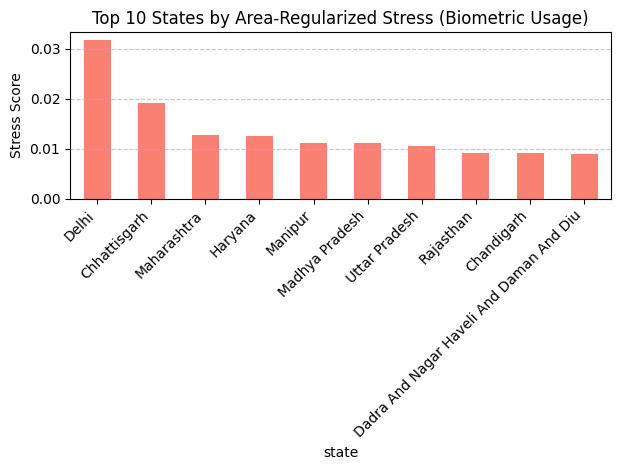

<Figure size 1000x500 with 0 Axes>

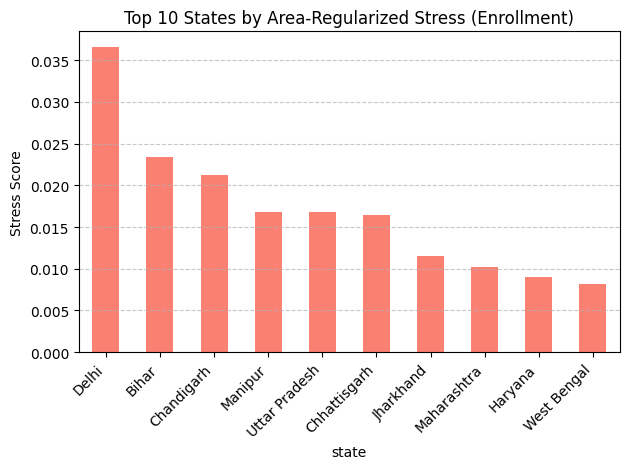

<Figure size 1000x500 with 0 Axes>

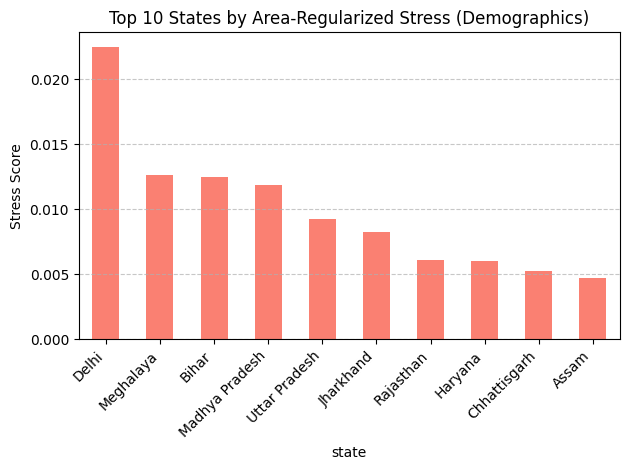

In [67]:
totals = ["total_biometrics", "total_enrollment", "total_demographics"]
titles = ["Biometric Usage", "Enrollment", "Demographics"]

for total_col, title in zip(totals, titles):
    # 90th percentile threshold for high-load
    threshold = df[total_col].quantile(0.90)
    high_load_col = f"high_load_{total_col}"
    df[high_load_col] = (df[total_col] >= threshold).astype(int)
    
    # State-wise high-load ratio
    highload_df = (
        df.groupby("state")[high_load_col]
          .mean()
          .reset_index(name="high_load_ratio")
    )
    
    # Map state areas
    highload_df["area_km2"] = highload_df["state"].map(state_area_km2)
    highload_df = highload_df.dropna(subset=["area_km2"])
    
    # Log area
    highload_df["log_area"] = np.log(highload_df["area_km2"].clip(lower=1))
    
    # Stress score
    highload_df["stress_score"] = highload_df["high_load_ratio"] / highload_df["log_area"]
    
    # Top 10 states by stress
    top10 = highload_df.sort_values("stress_score", ascending=False).head(10)
    
    # Plot
    plt.figure(figsize=(10,5))
    top10.plot(
        x="state", y="stress_score",
        kind="bar", color="salmon", legend=False
    )
    plt.title(f"Top 10 States by Area-Regularized Stress ({title})")
    plt.ylabel("Stress Score")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
🌎  Macro-Geographical Segmentation    </h1>
</div>


In [68]:
north_states = [
    "Delhi", "Haryana", "Punjab", "Uttar Pradesh", "Uttarakhand", "Bihar",
    "Himachal Pradesh", "Jammu And Kashmir", "Ladakh", "Chandigarh"
]

south_states = [
    "Tamil Nadu", "Karnataka", "Kerala",
    "Andhra Pradesh", "Telangana",
    "Puducherry", "Lakshadweep", "Andaman And Nicobar Islands"
]

west_states = [
    "Maharashtra", "Gujarat", "Rajasthan", "Goa",
    "Dadra And Nagar Haveli And Daman And Diu"
]

east_states = [
    "West Bengal", "Odisha", "Jharkhand",
    "Assam", "Tripura", "Manipur", "Meghalaya",
    "Mizoram", "Nagaland", "Arunachal Pradesh", "Sikkim"
]

central_states = [
    "Madhya Pradesh", "Chhattisgarh"
]


df["region"] = None

df.loc[df["state"].isin(north_states), "region"] = "North"
df.loc[df["state"].isin(south_states), "region"] = "South"
df.loc[df["state"].isin(west_states), "region"] = "West"
df.loc[df["state"].isin(east_states), "region"] = "East"
df.loc[df["state"].isin(central_states), "region"] = "Central"

In [69]:
# Analysis Configuration
totals = ["total_biometrics", "total_enrollment", "total_demographics"]
titles = ["Biometric Usage", "Enrollment", "Demographics"]

for total_col, title in zip(totals, titles):
    region_usage = df.groupby("region")[total_col].sum()
    region_share = (region_usage / region_usage.sum()) * 100
    
    # DISPLAY: Regional Header
    display(Markdown(f"<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🌎 Regional Market Share: {title}</b></h3>"))
    
    # Creating a professional styled table
    share_df = pd.DataFrame(region_share.sort_values(ascending=False)).rename(columns={total_col: "National Share (%)"})
    display(share_df.style.format("{:.2f}%").background_gradient(cmap='Purples'))
    
    print("\n")

<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🌎 Regional Market Share: Biometric Usage</b></h3>

,National Share (%)
region,
North,30.49%
West,23.52%
South,20.55%
Central,12.79%
East,12.66%


<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🌎 Regional Market Share: Enrollment</b></h3>

,National Share (%)
region,
North,36.55%
West,19.71%
South,17.46%
East,16.39%
Central,9.90%


<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🌎 Regional Market Share: Demographics</b></h3>

,National Share (%)
region,
North,37.06%
East,18.82%
West,18.32%
South,14.57%
Central,11.23%


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
 📍  District-Level Hotspot Identification
    </h1>
</div>


In [70]:
# Analysis configuration for granular hubs
totals = ["total_biometrics", "total_enrollment", "total_demographics"]
titles = ["Biometric Usage", "Enrollment", "Demographics"]
header_colors = ["#e8f5e9", "#e3f2fd", "#fff3e0"] # Green, Blue, Orange

for total_col, title, color in zip(totals, titles, header_colors):
    # Aggregating at the District level
    district_total = (
        df.groupby(["state", "district"])[total_col]
          .sum()
          .sort_values(ascending=False)
          .reset_index()
    )
    
    # DISPLAY: Styled Header
    display(Markdown(f"<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📍 Top 15 Service Hotspots: {title}</b></h3>"))
    
    # Displaying as a styled table for Kaggle professionalism
    top_districts = district_total.head(15).rename(columns={total_col: "Total Transactions"})
    
    # Formatting numbers with commas for readability
    styled_df = top_districts.style.format({"Total Transactions": "{:,.0f}"})\
                                    .background_gradient(subset=["Total Transactions"], cmap='YlGnBu')\
                                    .hide(axis='index')
    
    display(styled_df)
    print("\n" + "-"*70 + "\n")

<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📍 Top 15 Service Hotspots: Biometric Usage</b></h3>

state,district,Total Transactions
Maharashtra,Pune,"702,689"
Maharashtra,Thane,"688,809"
Maharashtra,Nashik,"667,911"
Maharashtra,Jalgaon,"473,615"
Gujarat,Ahmedabad,"470,105"
Maharashtra,Mumbai,"460,761"
Rajasthan,Jaipur,"434,854"
Delhi,North West Delhi,"429,407"
Andhra Pradesh,Kurnool,"428,846"
Maharashtra,Ahmadnagar,"411,366"



----------------------------------------------------------------------



<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📍 Top 15 Service Hotspots: Enrollment</b></h3>

state,district,Total Transactions
Maharashtra,Thane,"458,771"
Maharashtra,Pune,"450,169"
West Bengal,South 24 Parganas,"412,146"
West Bengal,Murshidabad,"386,346"
Gujarat,Surat,"369,496"
Delhi,North West Delhi,"321,884"
Karnataka,Bengaluru,"309,235"
West Bengal,North 24 Parganas,"304,869"
Rajasthan,Jaipur,"285,007"
Gujarat,Ahmedabad,"280,238"



----------------------------------------------------------------------



<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📍 Top 15 Service Hotspots: Demographics</b></h3>

state,district,Total Transactions
Maharashtra,Thane,"55,640"
Bihar,Sitamarhi,"47,267"
West Bengal,Murshidabad,"45,901"
Uttar Pradesh,Bahraich,"43,426"
West Bengal,South 24 Parganas,"42,659"
Maharashtra,Pune,"39,737"
Rajasthan,Jaipur,"39,383"
Karnataka,Bengaluru,"38,208"
West Bengal,North 24 Parganas,"36,074"
Bihar,East Champaran,"35,797"



----------------------------------------------------------------------



<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
📉  Intra-State Heterogeneity & Service Disparity
    </h1>
</div>


In [71]:
# Analysis Configuration: District-wise Variance Audit
totals = ["total_biometrics", "total_enrollment", "total_demographics"]
titles = ["Biometric Usage", "Enrollment", "Demographics"]
bg_colors = ["#f1f8e9", "#e3f2fd", "#fff3e0"] # Green, Blue, Orange

for total_col, title, color in zip(totals, titles, bg_colors):
    # Calculating the Standard Deviation across districts for each state
    district_variation = (
        df.groupby("state")[total_col]
          .std()
          .sort_values(ascending=False)
          .reset_index()
    )
    
    # DISPLAY: Styled Header
    display(Markdown(f"<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📊 Regional Disparity Leaderboard: {title}</b></h3></h3>"))
    
    # Creating a professional styled DataFrame
    variation_df = district_variation.head(10).rename(columns={total_col: "Inter-District Std Dev"})
    
    # Formatting and applying a gradient to highlight the 'Disparity Gap'
    styled_v_df = variation_df.style.format({"Inter-District Std Dev": "{:,.2f}"})\
                                      .background_gradient(cmap='Purples')\
                                      .hide(axis='index')
    
    display(styled_v_df)
    print("\n" + "—"*70 + "\n")

<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📊 Regional Disparity Leaderboard: Biometric Usage</b></h3></h3>

state,Inter-District Std Dev
Delhi,689.58
Madhya Pradesh,347.90
Chandigarh,280.53
Chhattisgarh,269.43
Haryana,262.82
Uttar Pradesh,222.20
Jharkhand,215.68
Maharashtra,202.13
Bihar,198.69
Manipur,185.68



——————————————————————————————————————————————————————————————————————



<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📊 Regional Disparity Leaderboard: Enrollment</b></h3></h3>

state,Inter-District Std Dev
Delhi,696.82
Chhattisgarh,319.93
Uttar Pradesh,236.21
Haryana,223.94
Jharkhand,186.24
Rajasthan,178.97
Madhya Pradesh,173.54
Chandigarh,171.75
Bihar,140.74
Uttarakhand,138.14



——————————————————————————————————————————————————————————————————————



<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📊 Regional Disparity Leaderboard: Demographics</b></h3></h3>

state,Inter-District Std Dev
Meghalaya,123.32
Delhi,83.28
Uttar Pradesh,52.89
Madhya Pradesh,44.63
Bihar,39.76
Haryana,38.27
Nagaland,37.85
Gujarat,32.57
Assam,31.23
Manipur,29.55



——————————————————————————————————————————————————————————————————————



<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
👥  Age-Specific Transaction Profiles    </h1>
</div>


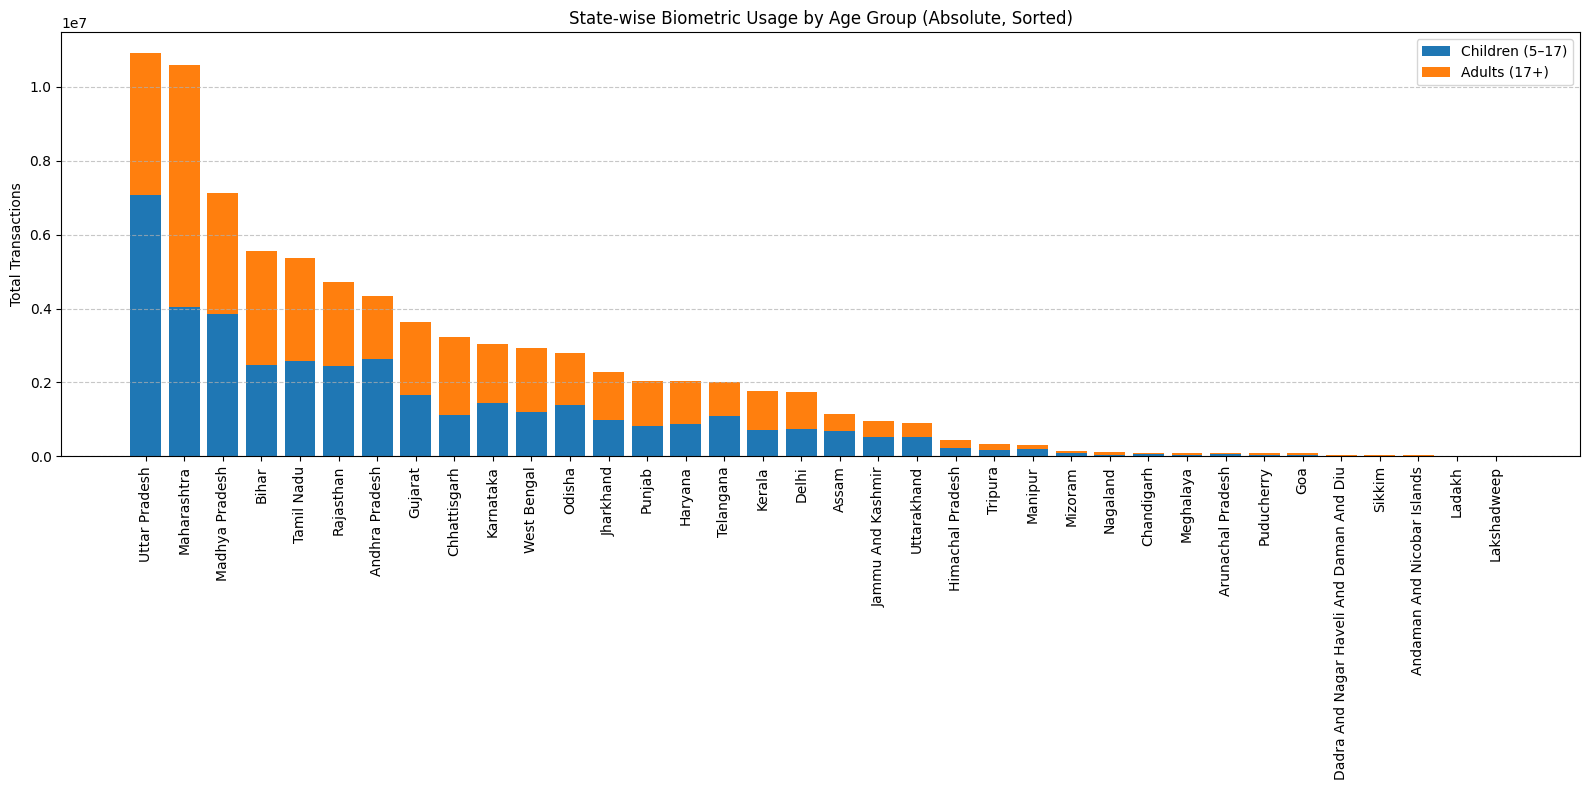

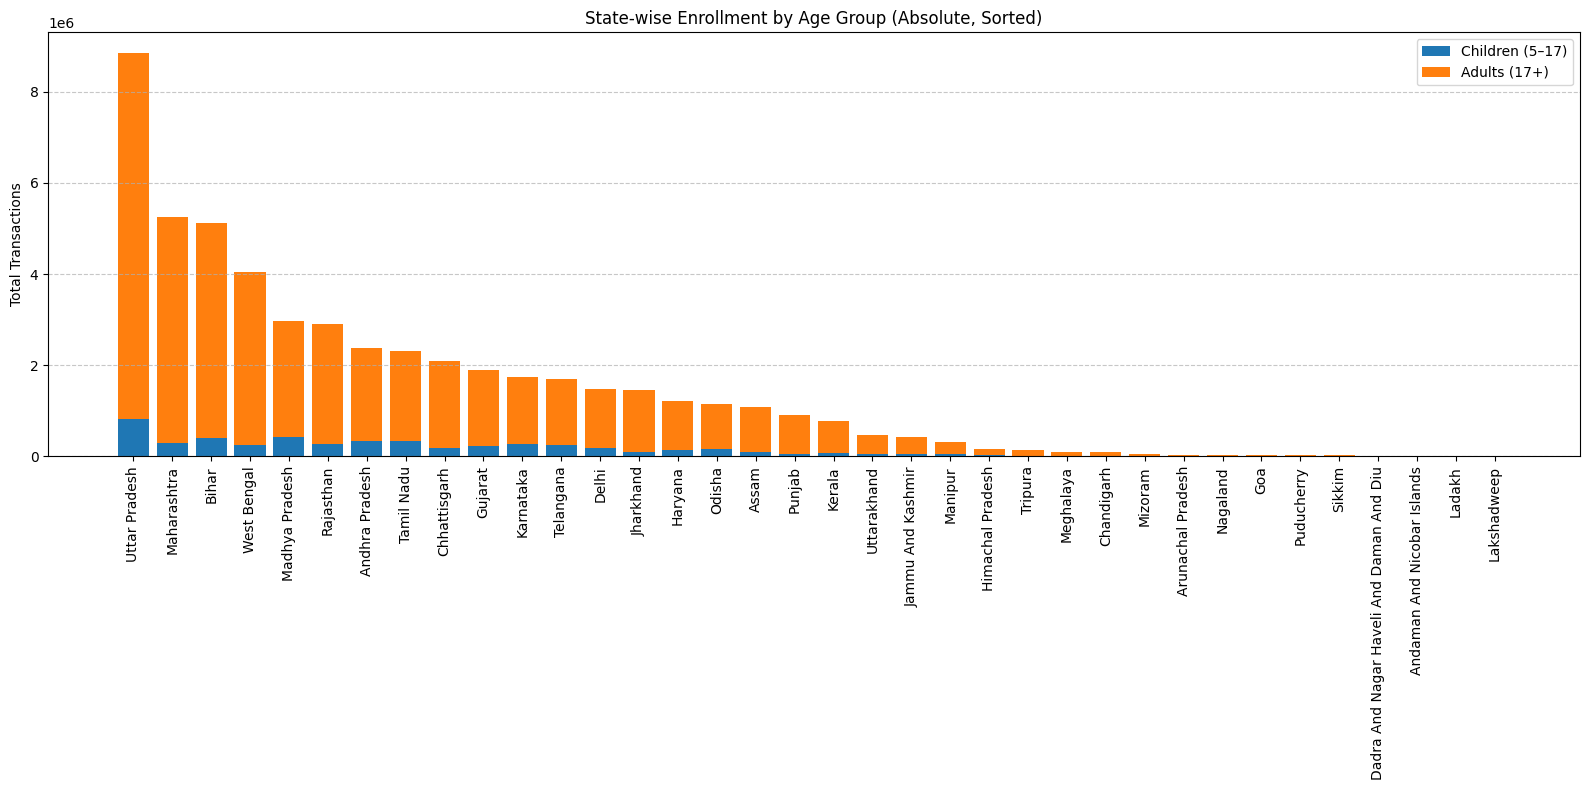

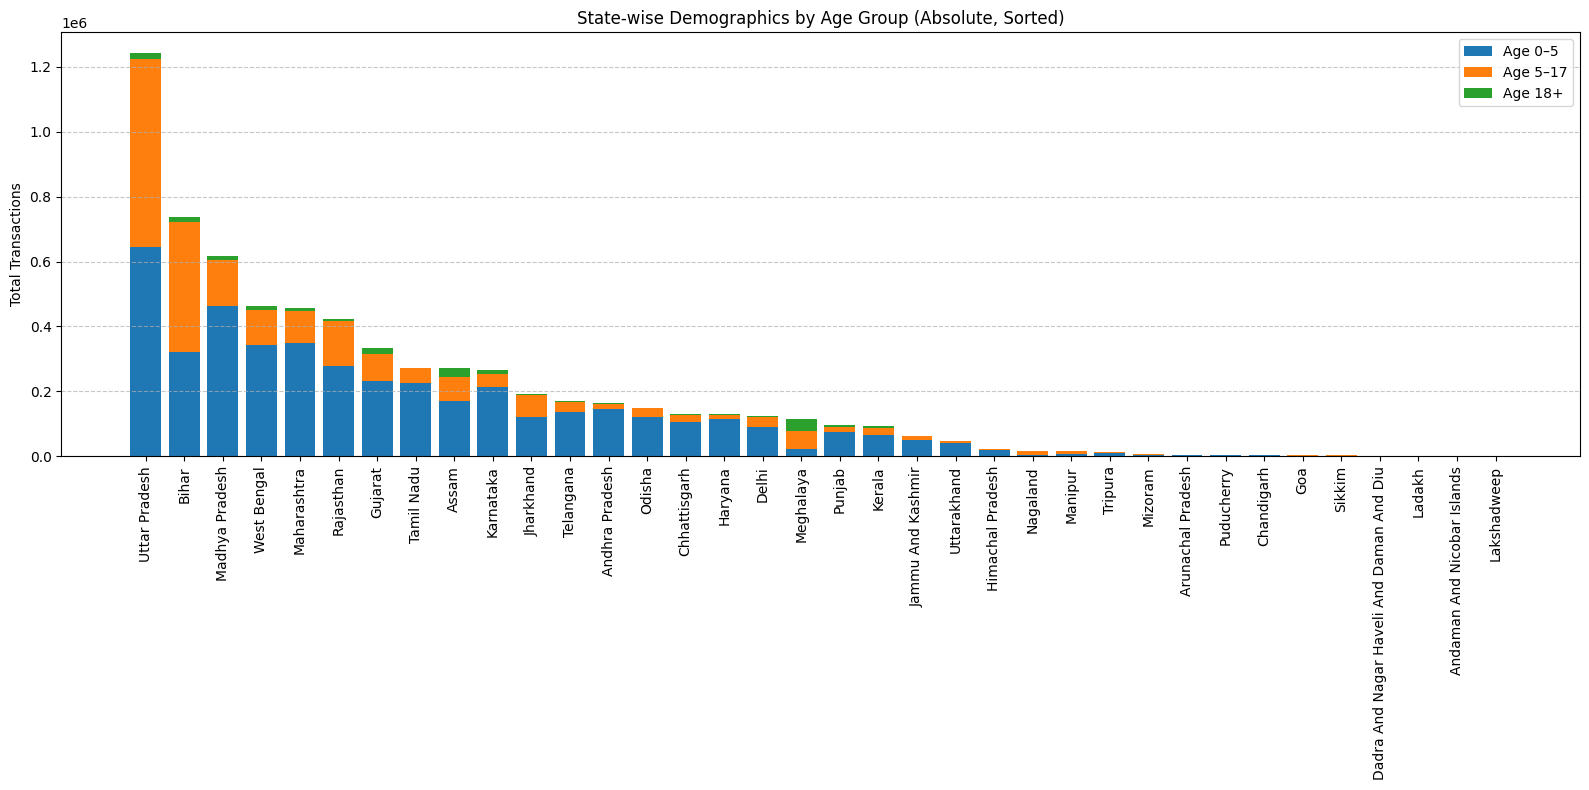

In [72]:
totals_cols = [
    ["bio_age_5_17","bio_age_17_"],
    ["demo_age_5_17","demo_age_17_"],
    ["age_0_5","age_5_17","age_18_greater"]
]
titles = ["Biometric Usage", "Enrollment", "Demographics"]
labels_list = [
    ["Children (5–17)", "Adults (17+)"],
    ["Children (5–17)", "Adults (17+)"],
    ["Age 0–5", "Age 5–17", "Age 18+"]
]

for cols, title, labels in zip(totals_cols, titles, labels_list):
    state_age = df.groupby("state")[cols].sum().reset_index()
    
    # Compute total for sorting
    state_age["total"] = state_age[cols].sum(axis=1)
    state_age = state_age.sort_values("total", ascending=False)
    
    plt.figure(figsize=(16,8))
    
    bottom = np.zeros(len(state_age))
    for col, label in zip(cols, labels):
        plt.bar(state_age["state"], state_age[col], bottom=bottom, label=label)
        bottom += state_age[col]
    
    plt.title(f"State-wise {title} by Age Group (Absolute, Sorted)")
    plt.ylabel("Total Transactions")
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
🕒  Temporal Trend Analysis & Service Seasonality </h1>
</div>


<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📈 National Aadhaar Usage Timeline (2025)</b></h3>

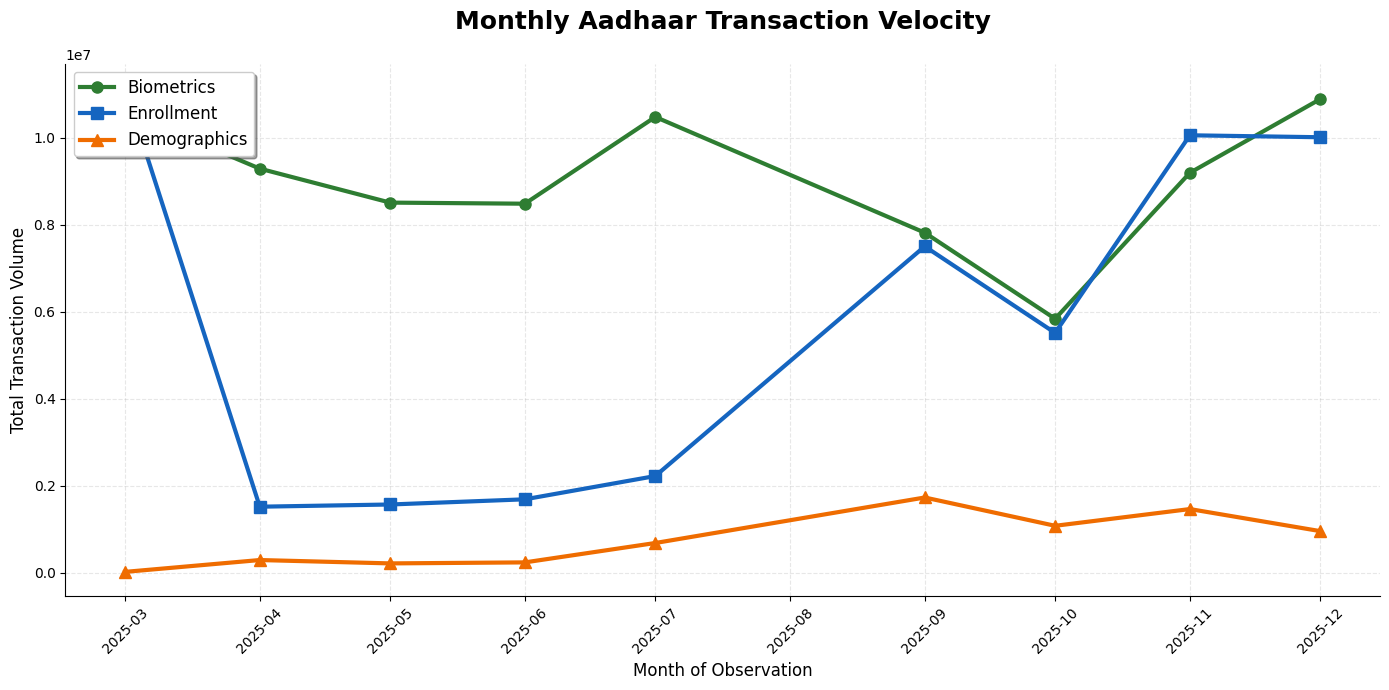

In [73]:
# --- 1. Temporal Pre-processing ---
# Ensuring date integrity and extracting time features
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# --- 2. Independent Monthly Aggregation ---
# We aggregate columns independently to ensure sparse data doesn't drop valid time points
monthly_bio = df.groupby(["year","month"])["total_biometrics"].sum(min_count=1).reset_index()
monthly_enroll = df.groupby(["year","month"])["total_enrollment"].sum(min_count=1).reset_index()
monthly_demo = df.groupby(["year","month"])["total_demographics"].sum(min_count=1).reset_index()

# Constructing a synchronized datetime index for plotting
for m_df in [monthly_bio, monthly_enroll, monthly_demo]:
    m_df["date"] = pd.to_datetime(dict(year=m_df["year"], month=m_df["month"], day=1))
    m_df.sort_values("date", inplace=True)

# --- 3. Professional Visual Narrative ---
display(Markdown("<h3 style='text-align:center; padding: 12px; border-radius: 8px;'><b>📈 National Aadhaar Usage Timeline (2025)</b></h3>"))

plt.figure(figsize=(14,7))

# Plotting with professional color palette (Green, Blue, Orange)
plt.plot(monthly_bio["date"], monthly_bio["total_biometrics"], marker="o", markersize=8, 
         linewidth=3, label="Biometrics", color="#2e7d32")
plt.plot(monthly_enroll["date"], monthly_enroll["total_enrollment"], marker="s", markersize=8, 
         linewidth=3, label="Enrollment", color="#1565c0")
plt.plot(monthly_demo["date"], monthly_demo["total_demographics"], marker="^", markersize=8, 
         linewidth=3, label="Demographics", color="#ef6c00")

# Aesthetic Refinements
plt.title("Monthly Aadhaar Transaction Velocity", fontsize=18, fontweight='bold', pad=25)
plt.xlabel("Month of Observation", fontsize=12)
plt.ylabel("Total Transaction Volume", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.xticks(rotation=45)
plt.legend(frameon=True, fontsize=12, loc='upper left', shadow=True)

# Clean Kaggle Spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
🔮  Predictive Forecasting & Resource Planning    </h1>
</div>


<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🔮 Biometrics Demand Projection (60-Month Forecast)</b></h3>

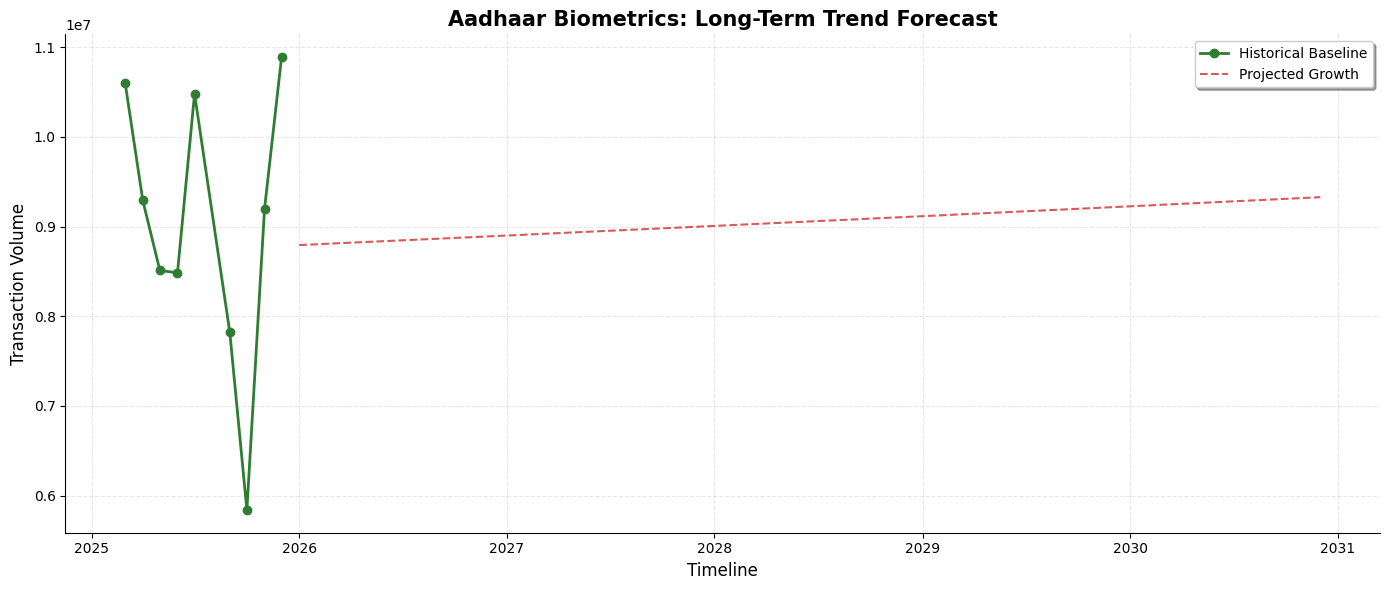

<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🔮 Enrollment Demand Projection (60-Month Forecast)</b></h3>

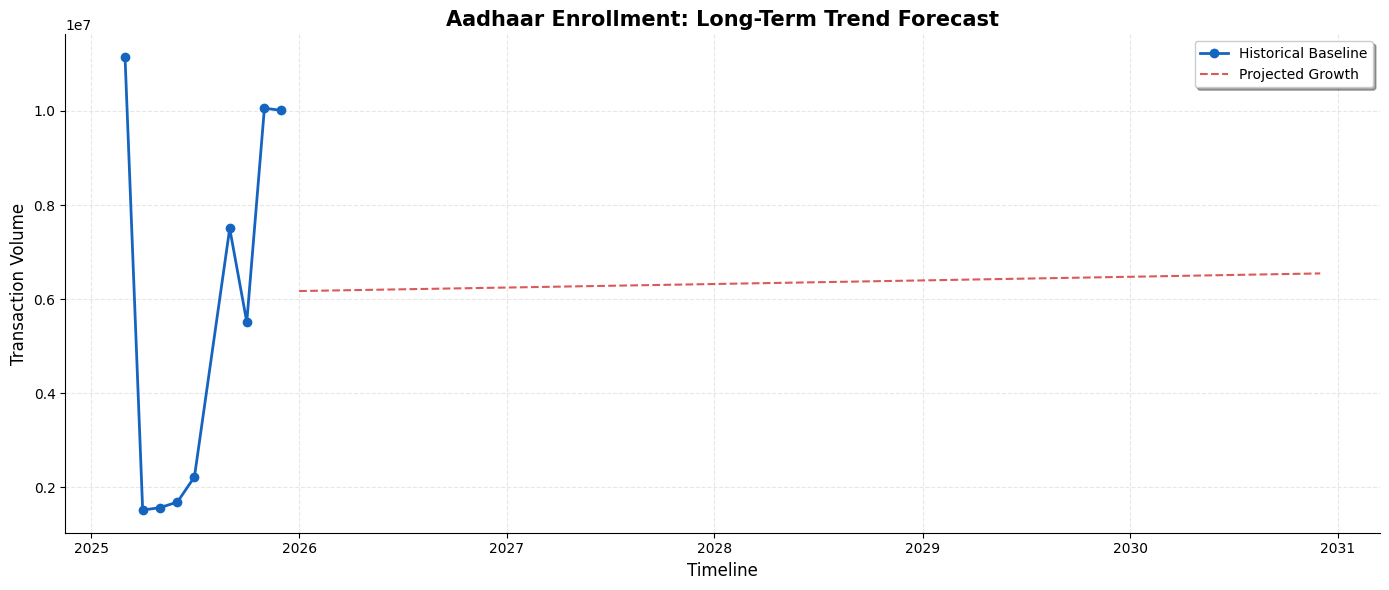

<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🔮 Demographics Demand Projection (60-Month Forecast)</b></h3>

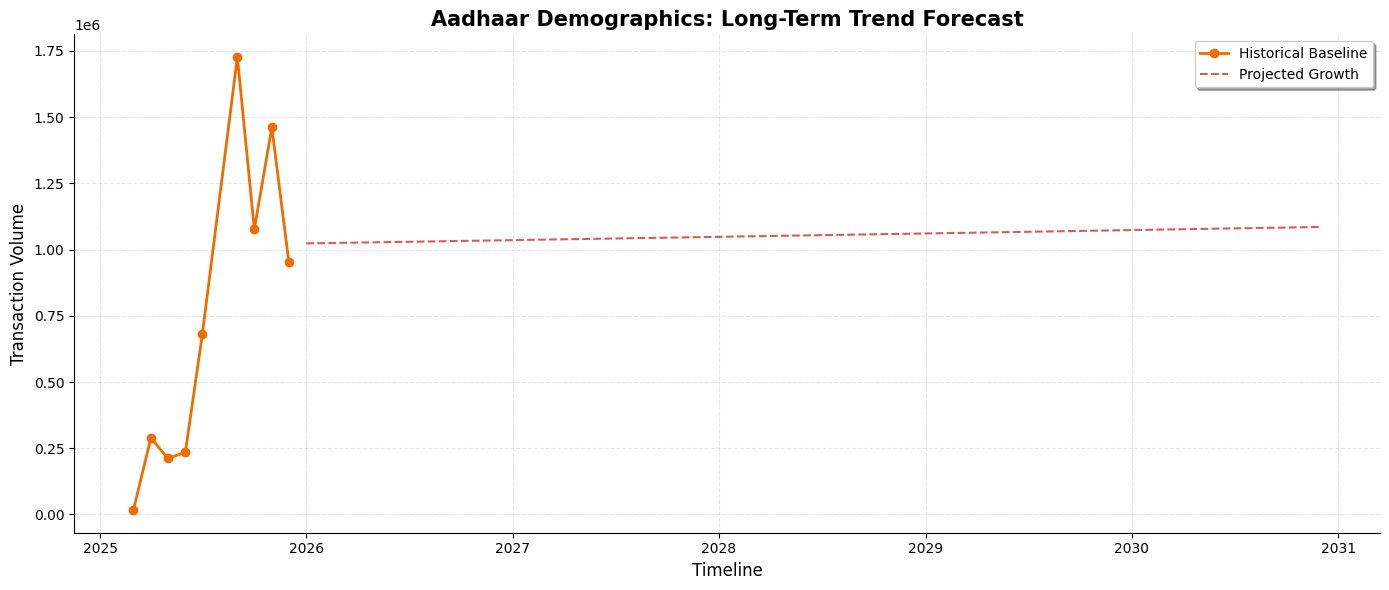

In [74]:
# --- 1. Temporal Engineering ---
# Standardizing date formats for time-series compatibility
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# --- 2. Multi-Channel Aggregation ---
# Independent grouping ensures maximum data retention for sparse months
monthly = (
    df.groupby(["year", "month"])[
        ["total_biometrics", "total_enrollment", "total_demographics"]
    ]
    .sum(min_count=1) 
    .reset_index()
)

# Aligning to the start of each month for consistent indexing
monthly["date"] = pd.to_datetime(
    dict(year=monthly["year"], month=monthly["month"], day=1)
)
monthly = monthly.sort_values("date")

# --- 3. Forecast Configuration ---
monthly_cols = [
    ("total_biometrics", "Biometrics", "#2e7d32"), # Green
    ("total_enrollment", "Enrollment", "#1565c0"), # Blue
    ("total_demographics", "Demographics", "#ef6c00") # Orange
]

# Assuming a conservative 0.1% growth drift per month
monthly_drift = 0.001 

# --- 4. Iterative Forecast & Visualization ---
for col, label, color in monthly_cols:
    # Data cleaning for the specific series
    monthly_col = monthly[["date", col]].dropna()
    
    # Baseline: Average of the last 2 quarters (6 months)
    baseline = monthly_col.tail(6)[col].mean()
    
    # Projection Window: Next 60 Months
    future_dates = pd.date_range(
        start=monthly_col["date"].iloc[-1] + pd.offsets.MonthBegin(1),
        periods=60, freq="MS"
    )
    
    future = pd.DataFrame({"date": future_dates})
    future["forecast"] = baseline * (1 + monthly_drift) ** np.arange(1, 61)
    
    # STYLED HEADER
    display(Markdown(f"<h3 style='text-align:center; padding: 10px; border-radius: 5px;'><b>🔮 {label} Demand Projection (60-Month Forecast)</b></h3>"))

    # PLOTTING
    plt.figure(figsize=(14,6))
    plt.plot(monthly_col["date"], monthly_col[col], marker="o", label="Historical Baseline", color=color, linewidth=2)
    plt.plot(future["date"], future["forecast"], linestyle="--", label="Projected Growth", color="#d32f2f", alpha=0.8)
    
    # Aesthetic Refinements
    plt.title(f"Aadhaar {label}: Long-Term Trend Forecast", fontsize=15, fontweight='bold')
    plt.xlabel("Timeline", fontsize=12)
    plt.ylabel("Transaction Volume", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.legend(frameon=True, shadow=True)
    
    # Removing chart spines for modern UI
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()